In [2]:
import numpy as np
import cvxpy as cp

np.random.seed(1)

import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica Neue"],
    "font.size": 20,
    "figure.figsize": (8, 6),
    "figure.dpi": 150})

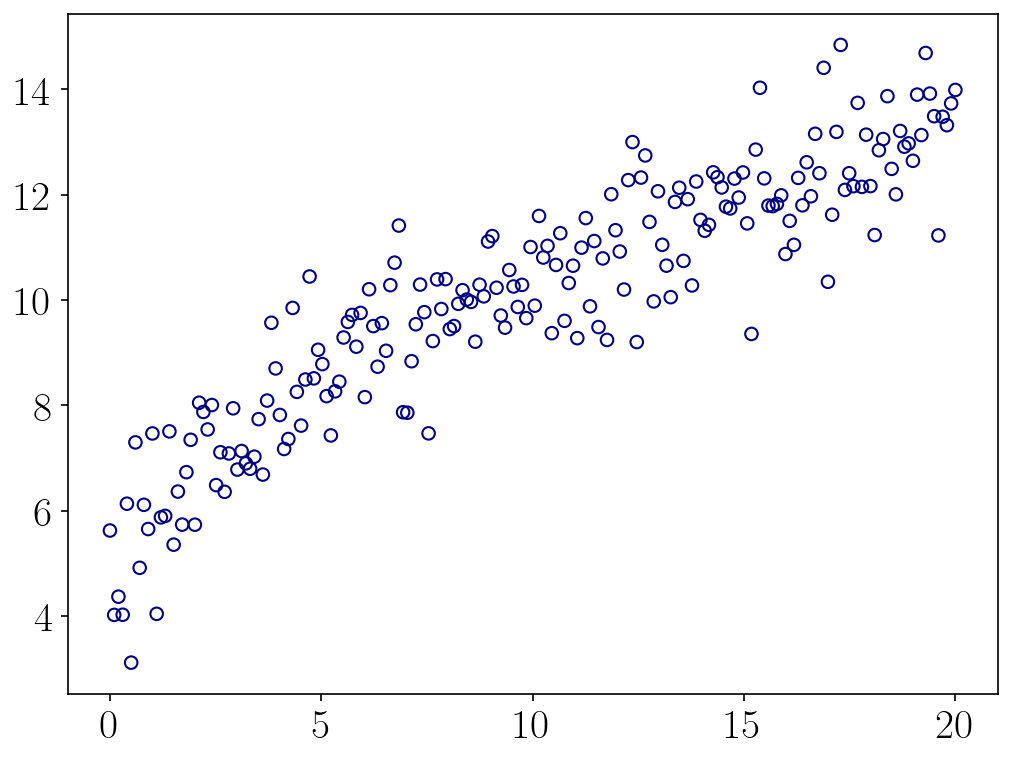

In [3]:
N = 200
t = np.linspace(0, 20, N)

#make up a function 
#: f(t) = 4  + 2* sqrt(t)
f = 4 + 2*np.power(t,1/2)

#add some noise on top
f = f + np.random.randn(N) * 1

plt.scatter(t, f, marker='o', color='navy', facecolors='none')

x = [ 2.97559693 -0.19546921  0.06852369 -0.07410631  0.17511391 -0.01931898
  0.00311878  2.89861619]
8


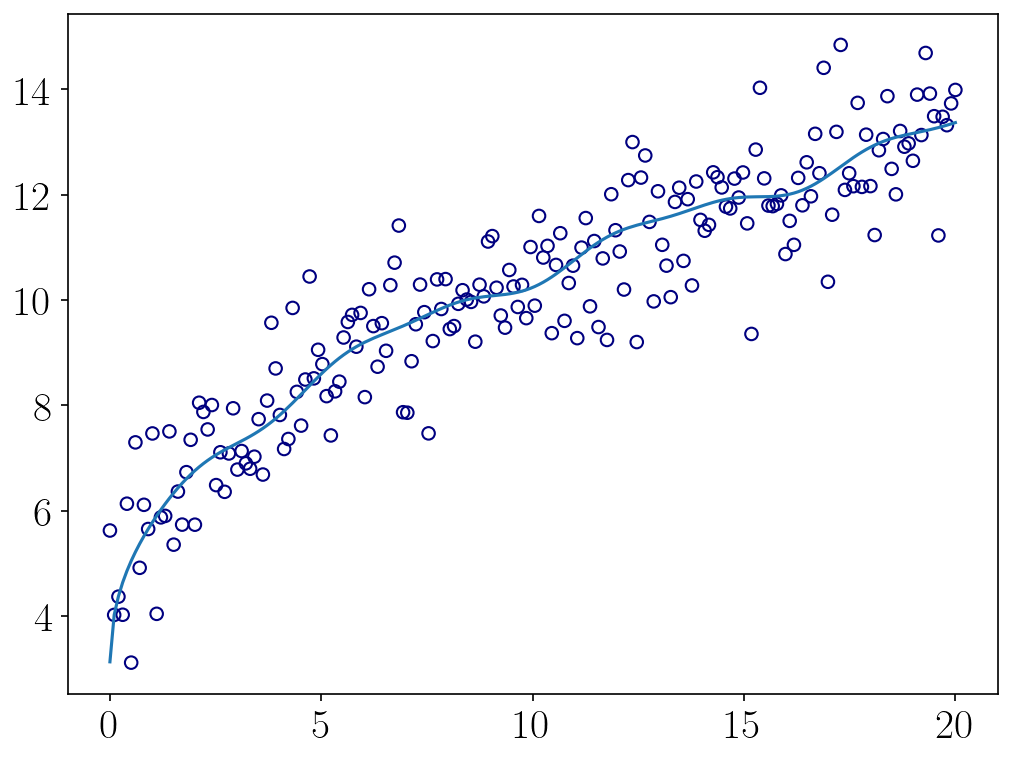

In [4]:
A = np.column_stack((np.ones(N),
                     t,
                     np.sin(t),
                     np.sin(2*t),
                     np.cos(t),
                     np.cos(2*t),
                     np.power(t,2),
                     np.power(t,1/2)))

b = f

#regression in cvxpy
n = len(A[0])  #number of function coefficients required
x = cp.Variable(n)
cost = cp.norm(A @ x - b,1)
#cost = cp.norm(A @ x - b,1) + cp.norm(x,1)*0.01  #try 0.01,0.1,1,10,20 here
prob = cp.Problem(cp.Minimize(cost))
prob.solve()
xsol = x.value


#plot the solution
plt.scatter(t,f,marker='o',color='navy',facecolors='none')
plt.plot(t,A.dot(xsol))
plt.savefig("least_squares_fit.pdf")
print("x =", xsol)
print(n)

x = [3.84007796 2.08954569]


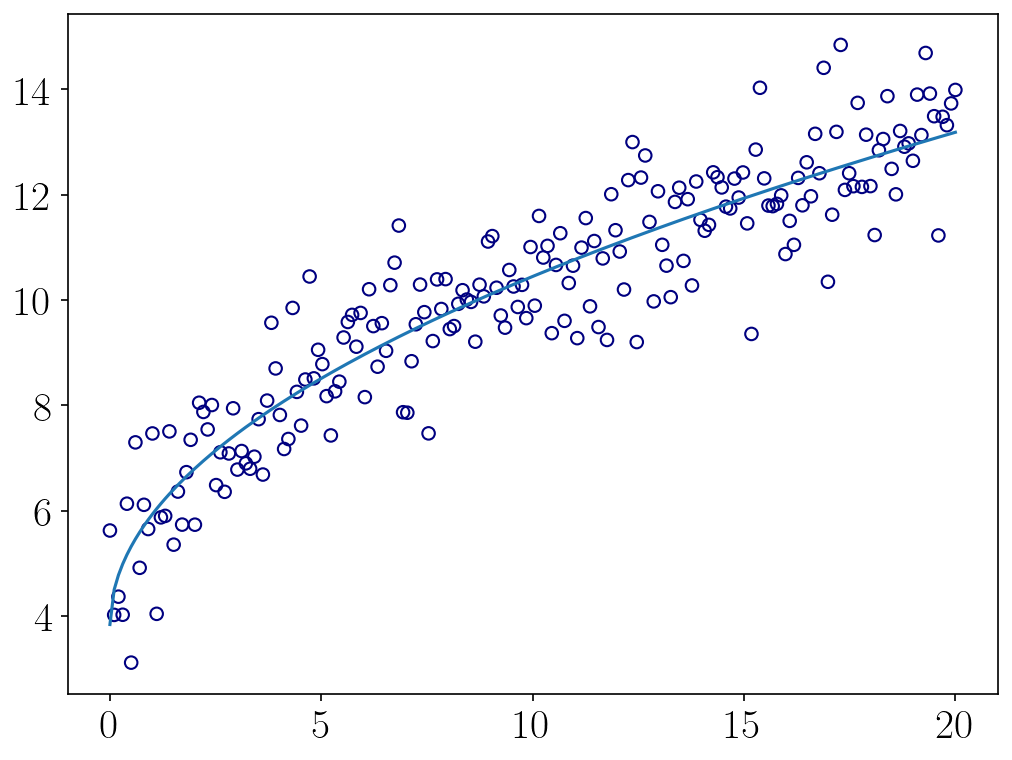

In [5]:
#use only identified coefficients
A_new = A[:,[0, n-1]]

#regression in cvxpy, using only identified coefficients
n_new = len(A_new[0])  #number of coefficients required  
x = cp.Variable(n_new)
cost = cp.sum_squares(A_new @ x - b)
prob = cp.Problem(cp.Minimize(cost))
prob.solve()
xsol = x.value

#plot the solution
plt.scatter(t, f, marker='o', color='navy', facecolors='none')
plt.plot(t, A_new.dot(xsol))
plt.savefig("lasso_fit.pdf")
print("x =", xsol)